In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
%sx pwd

from pprint import pprint

import matplotlib.pylab as plt
import openpifpaf.logs

# Latest

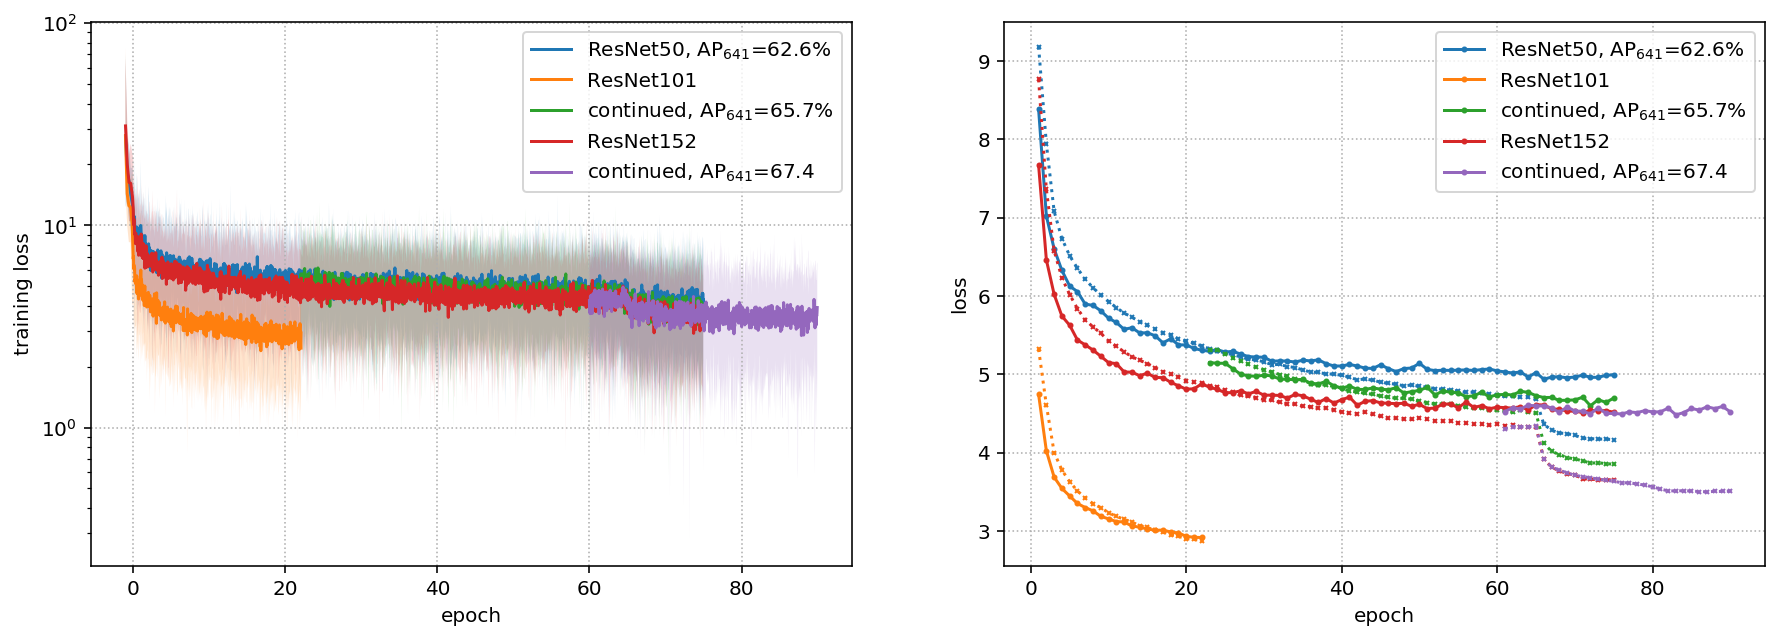

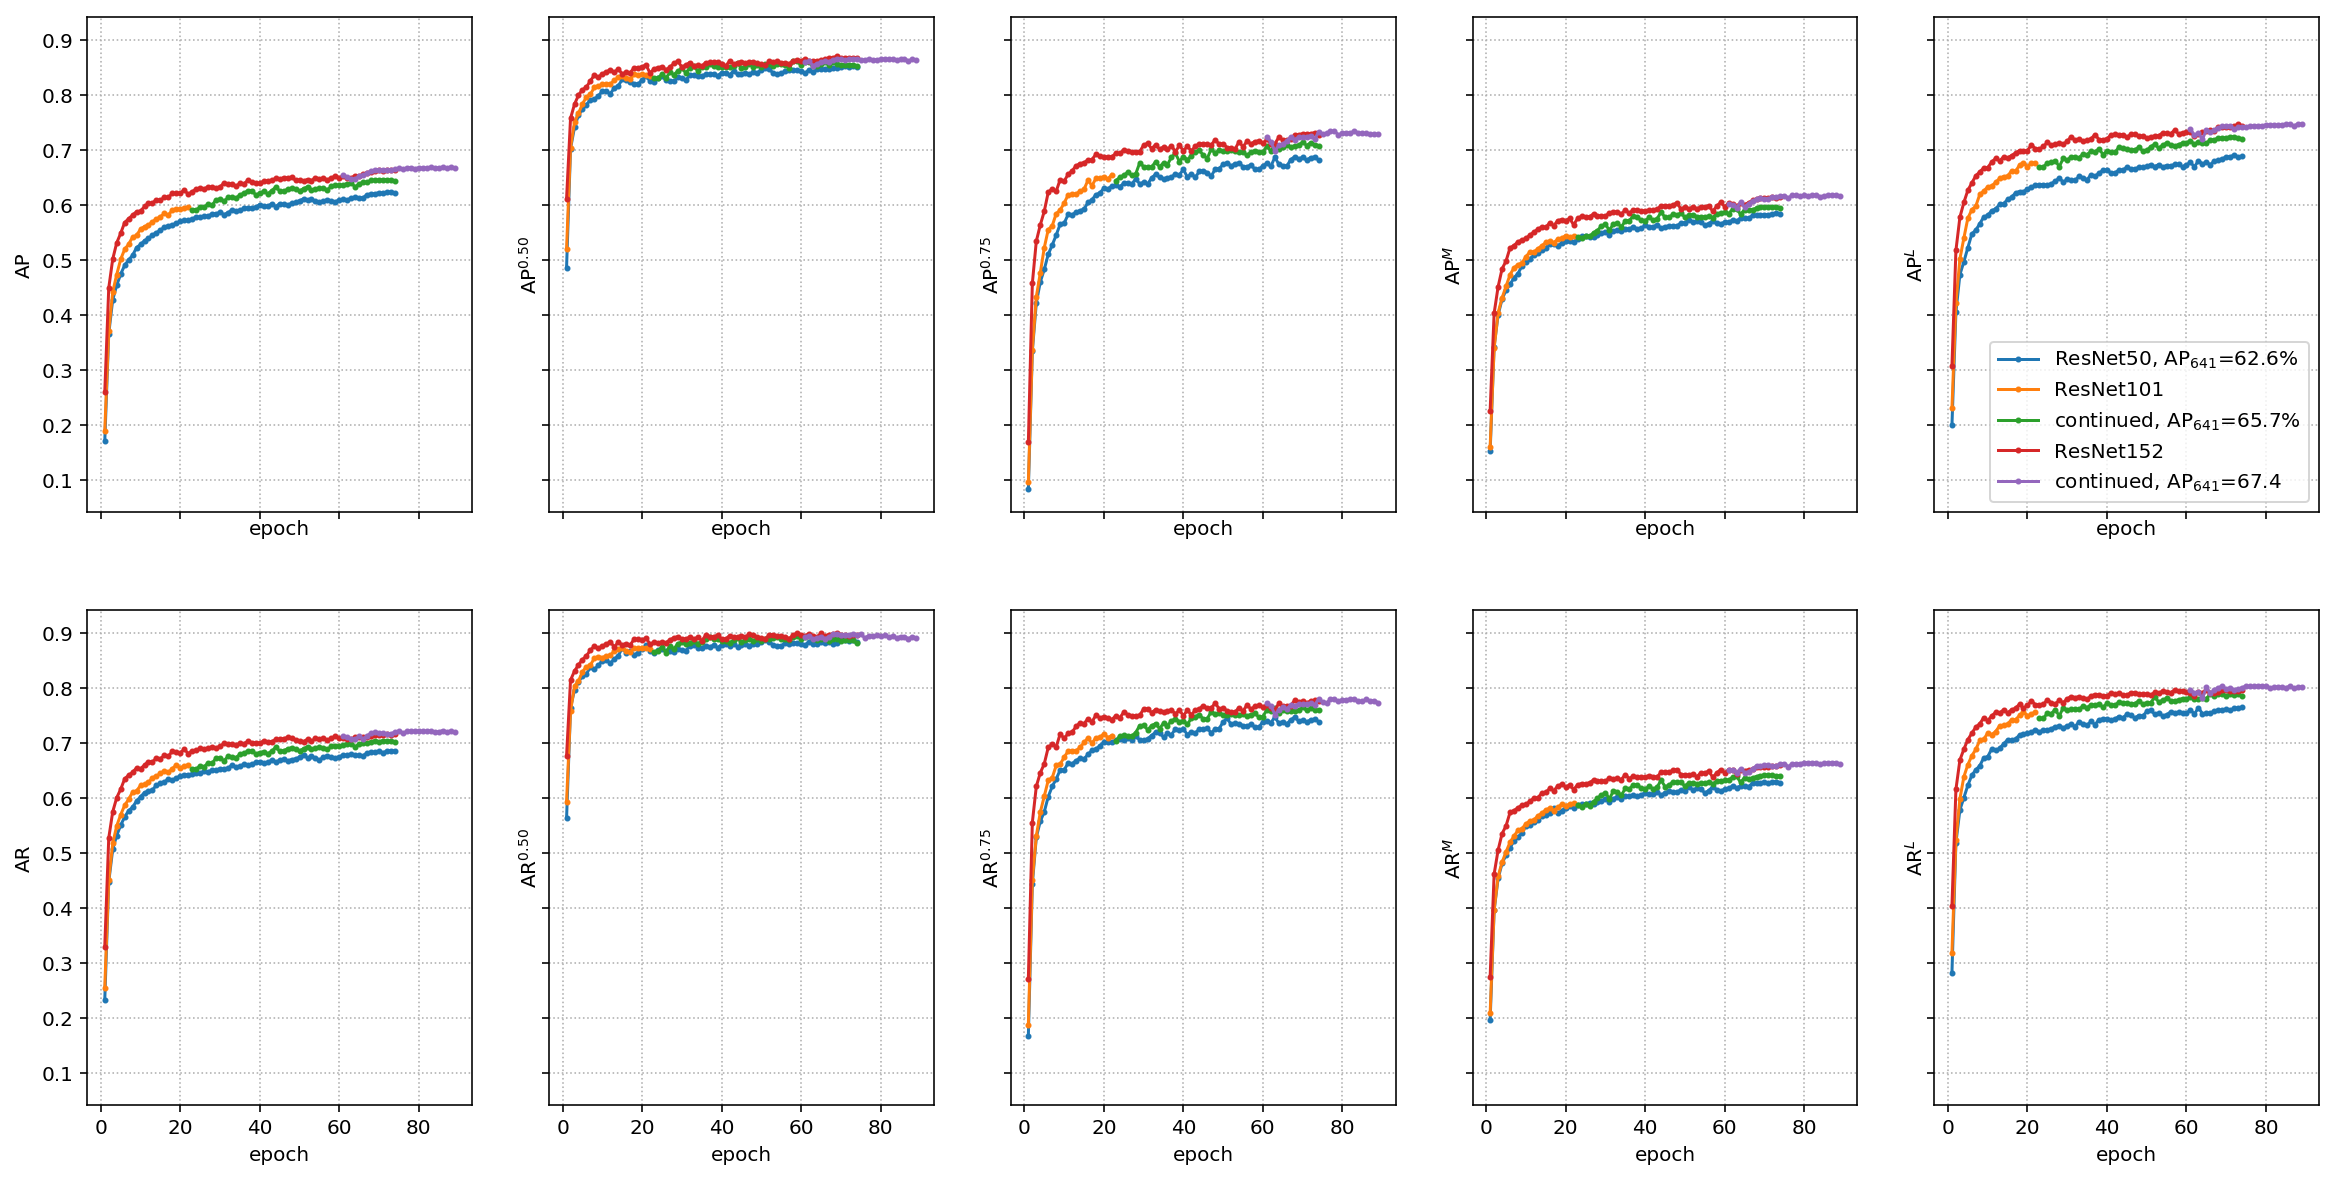

In [2]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
plots = openpifpaf.logs.Plots([
    '../outputs/resnet50block5-pif-paf-edge401-190315-214317.pkl.log',
    '../outputs/resnet101block5-pif-paf-edge401-190312-174323.pkl.log',
    '../outputs/resnet101block5-pif-paf-edge401-190313-100107.pkl.log',
    '../outputs/resnet152block5-pif-paf-edge401-190317-122933.pkl.log',
    '../outputs/resnet152block5-pif-paf-edge401-190322-092459.pkl.log',
], [
    'ResNet50, AP$_{641}$=62.6%',
    'ResNet101',
    'continued, AP$_{641}$=65.7%',
    'ResNet152',
    'continued, AP$_{641}$=67.4',
])
#pprint(plots.process_arguments())
plots.train(ax1); ax1.set_yscale('log', nonposy='clip')
plots.epoch_loss(ax2)

# Precision and Recall plots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharey=True, sharex=True)
openpifpaf.logs.EvalPlots(plots.log_files, plots.labels, edge=641, samples=500).fill_all(axs)
axs[0, 4].legend();

# Ablation Study of Regression Losses

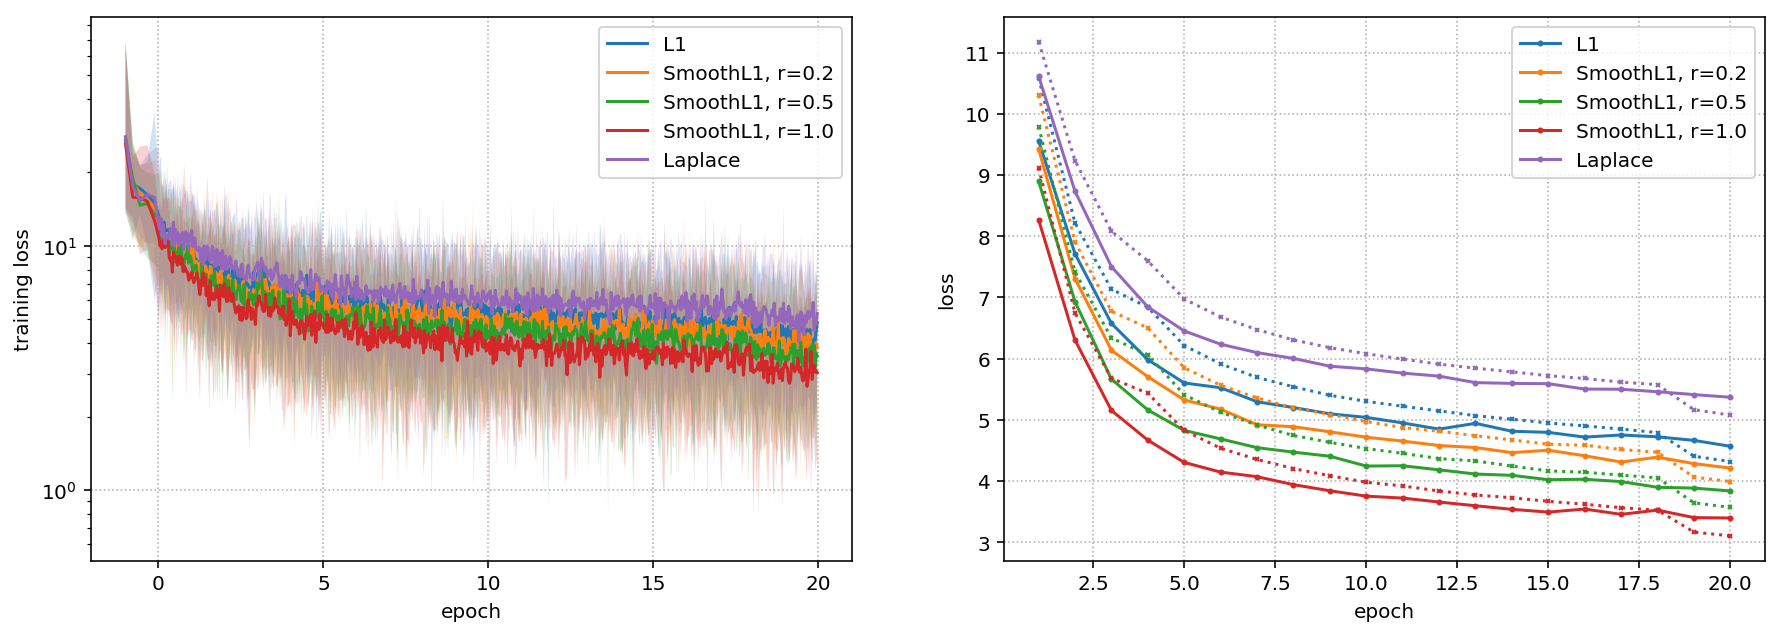

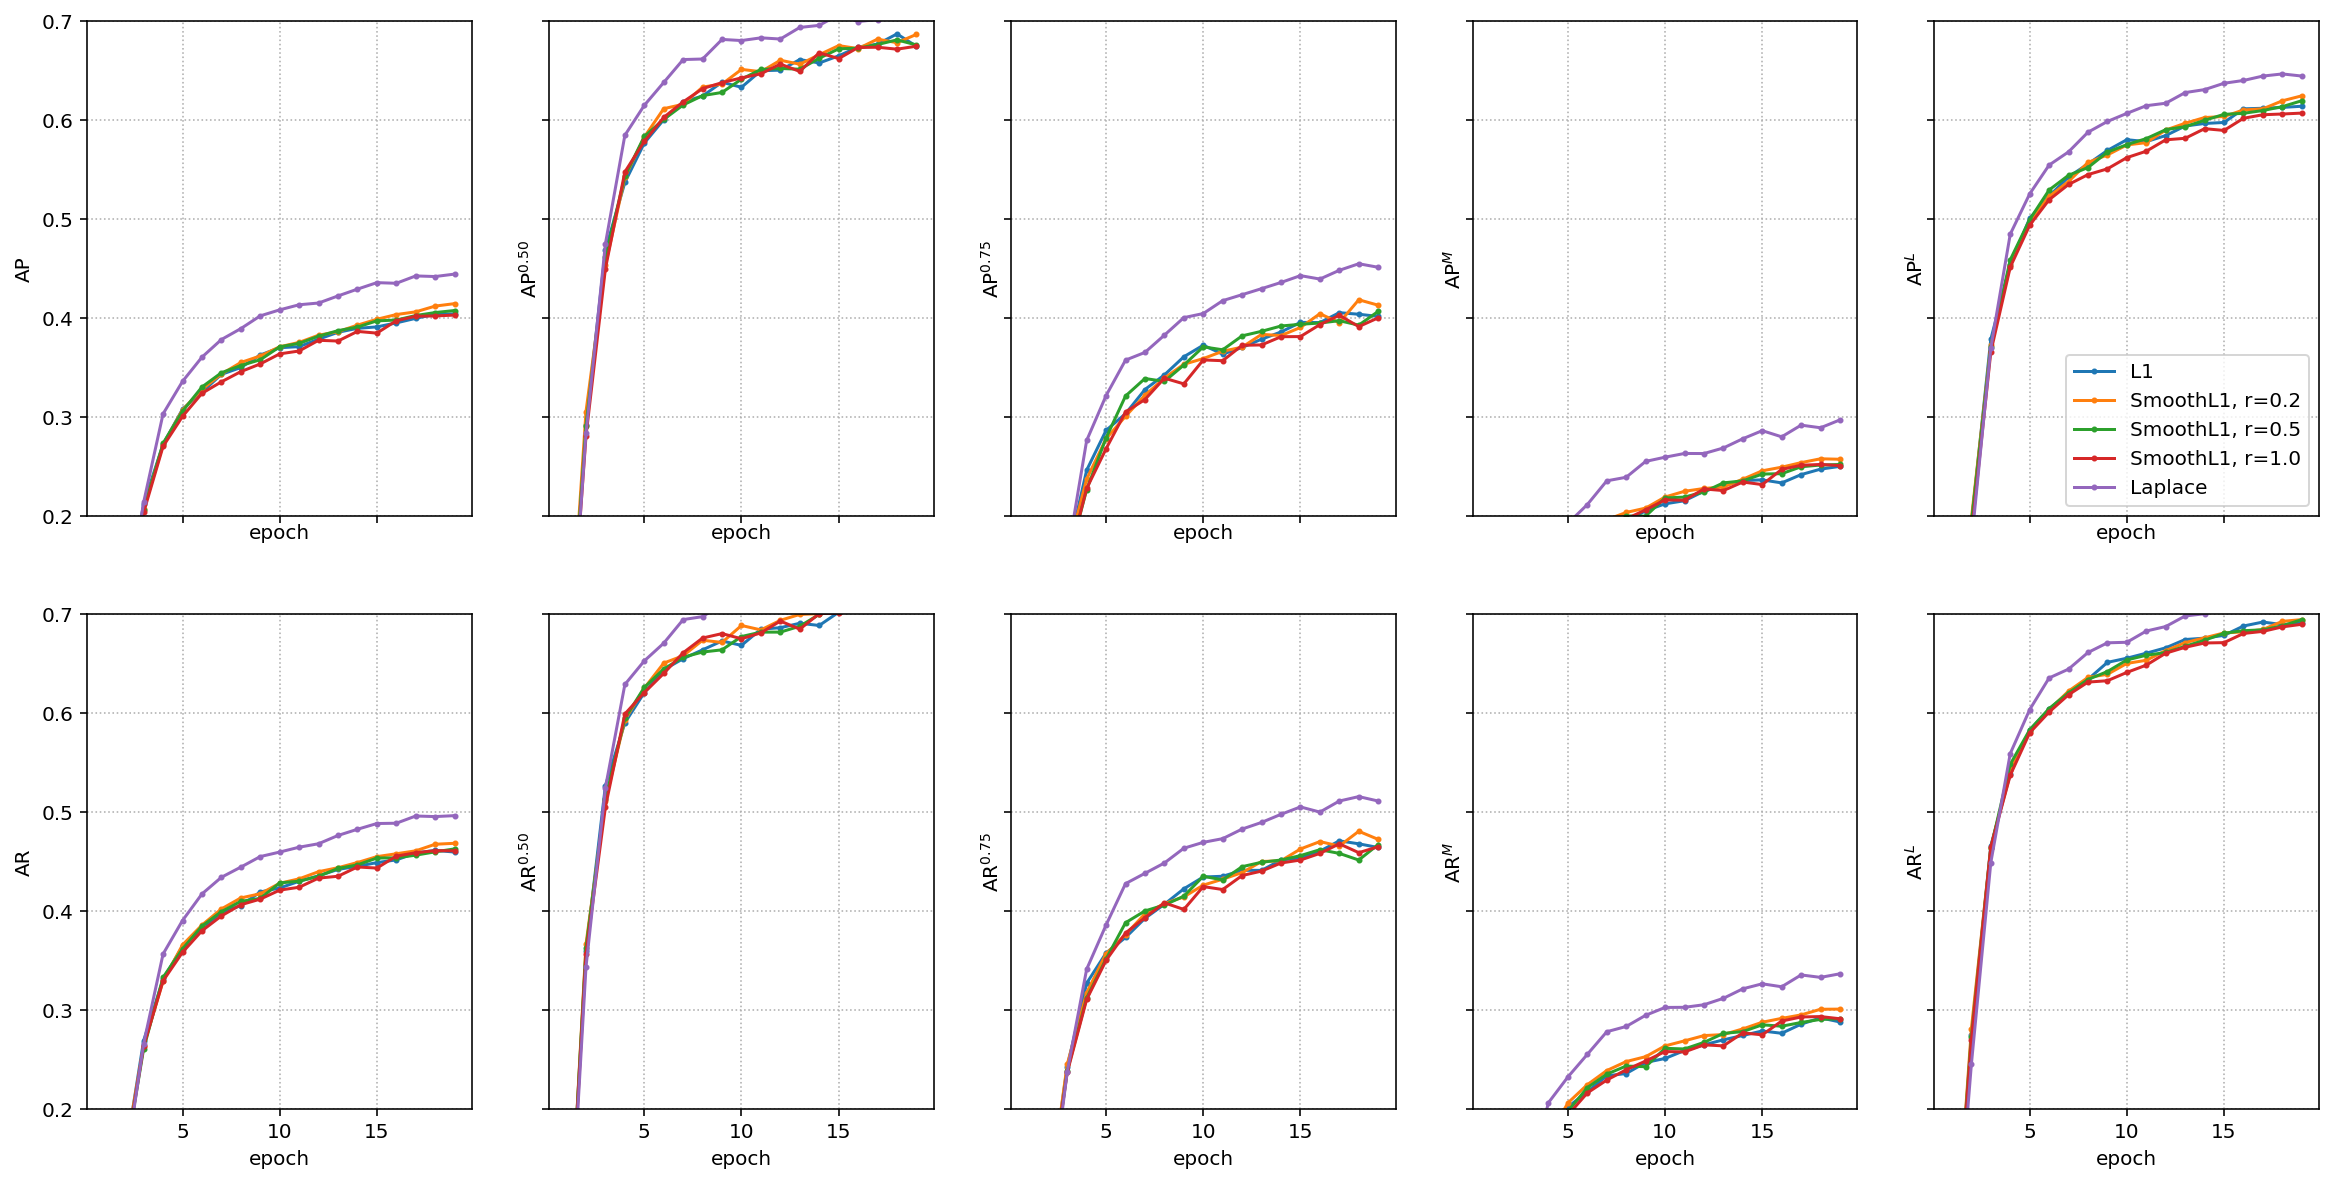

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
plots = openpifpaf.logs.Plots([
    '../outputs/resnet50block5-pif-paf-edge401-l1-190403-162441.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-smoothl1-rsmooth0.2-190401-114702.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-smoothl1-rsmooth0.5-190403-162449.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-smoothl1-rsmooth1.0-190401-114712.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-190401-220105.pkl.log',
], [
    'L1',
    'SmoothL1, r=0.2',
    'SmoothL1, r=0.5',
    'SmoothL1, r=1.0',
    'Laplace',
])
# pprint(plots.process_arguments())
plots.train(ax1); ax1.set_yscale('log', nonposy='clip')
plots.epoch_loss(ax2)

# Precision and Recall plots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharey=True, sharex=True)
axs[0, 0].set_ylim(0.2, 0.7)
openpifpaf.logs.EvalPlots(plots.log_files, plots.labels, edge=321, samples=500).fill_all(axs)
axs[0, 4].legend();

# Without ImageNet Pretraining

Not a good idea.

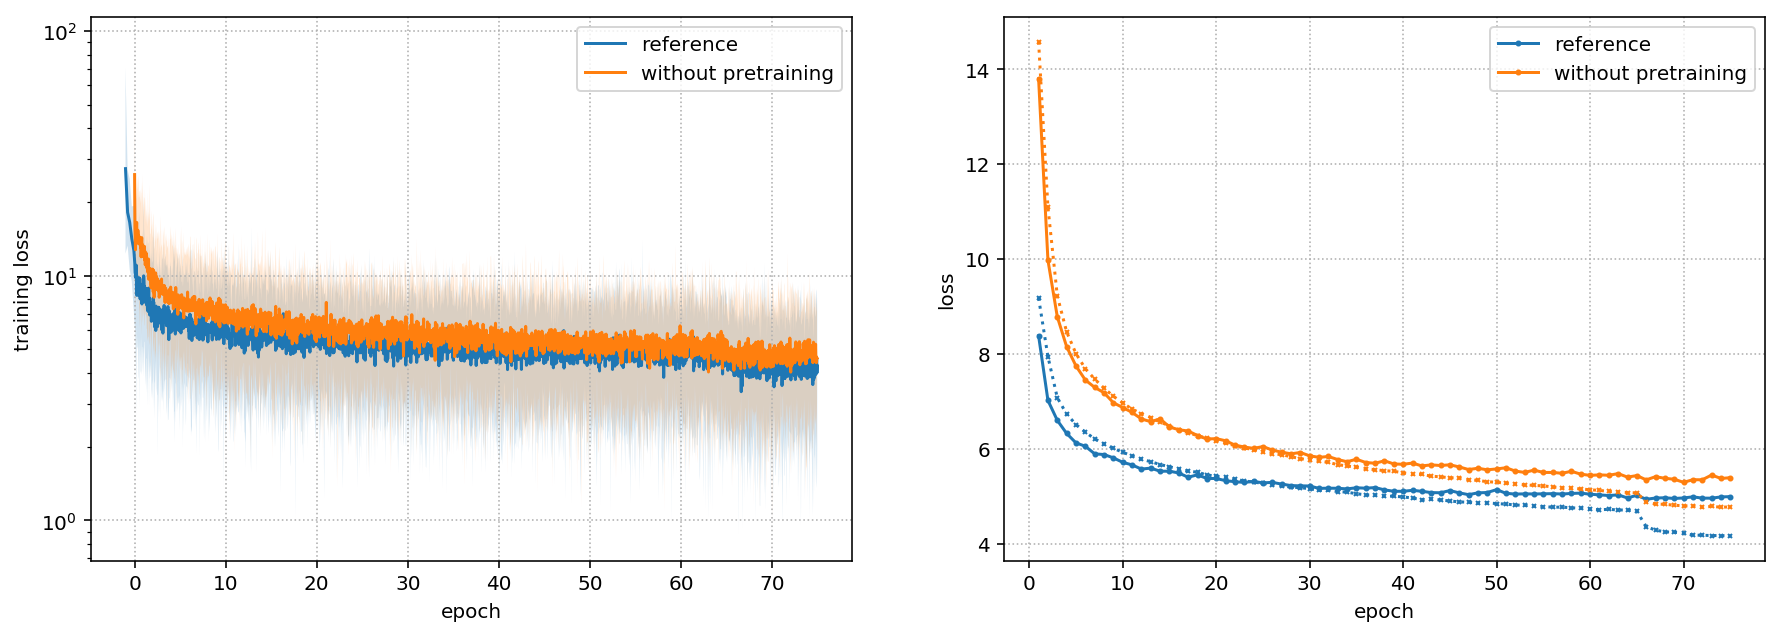

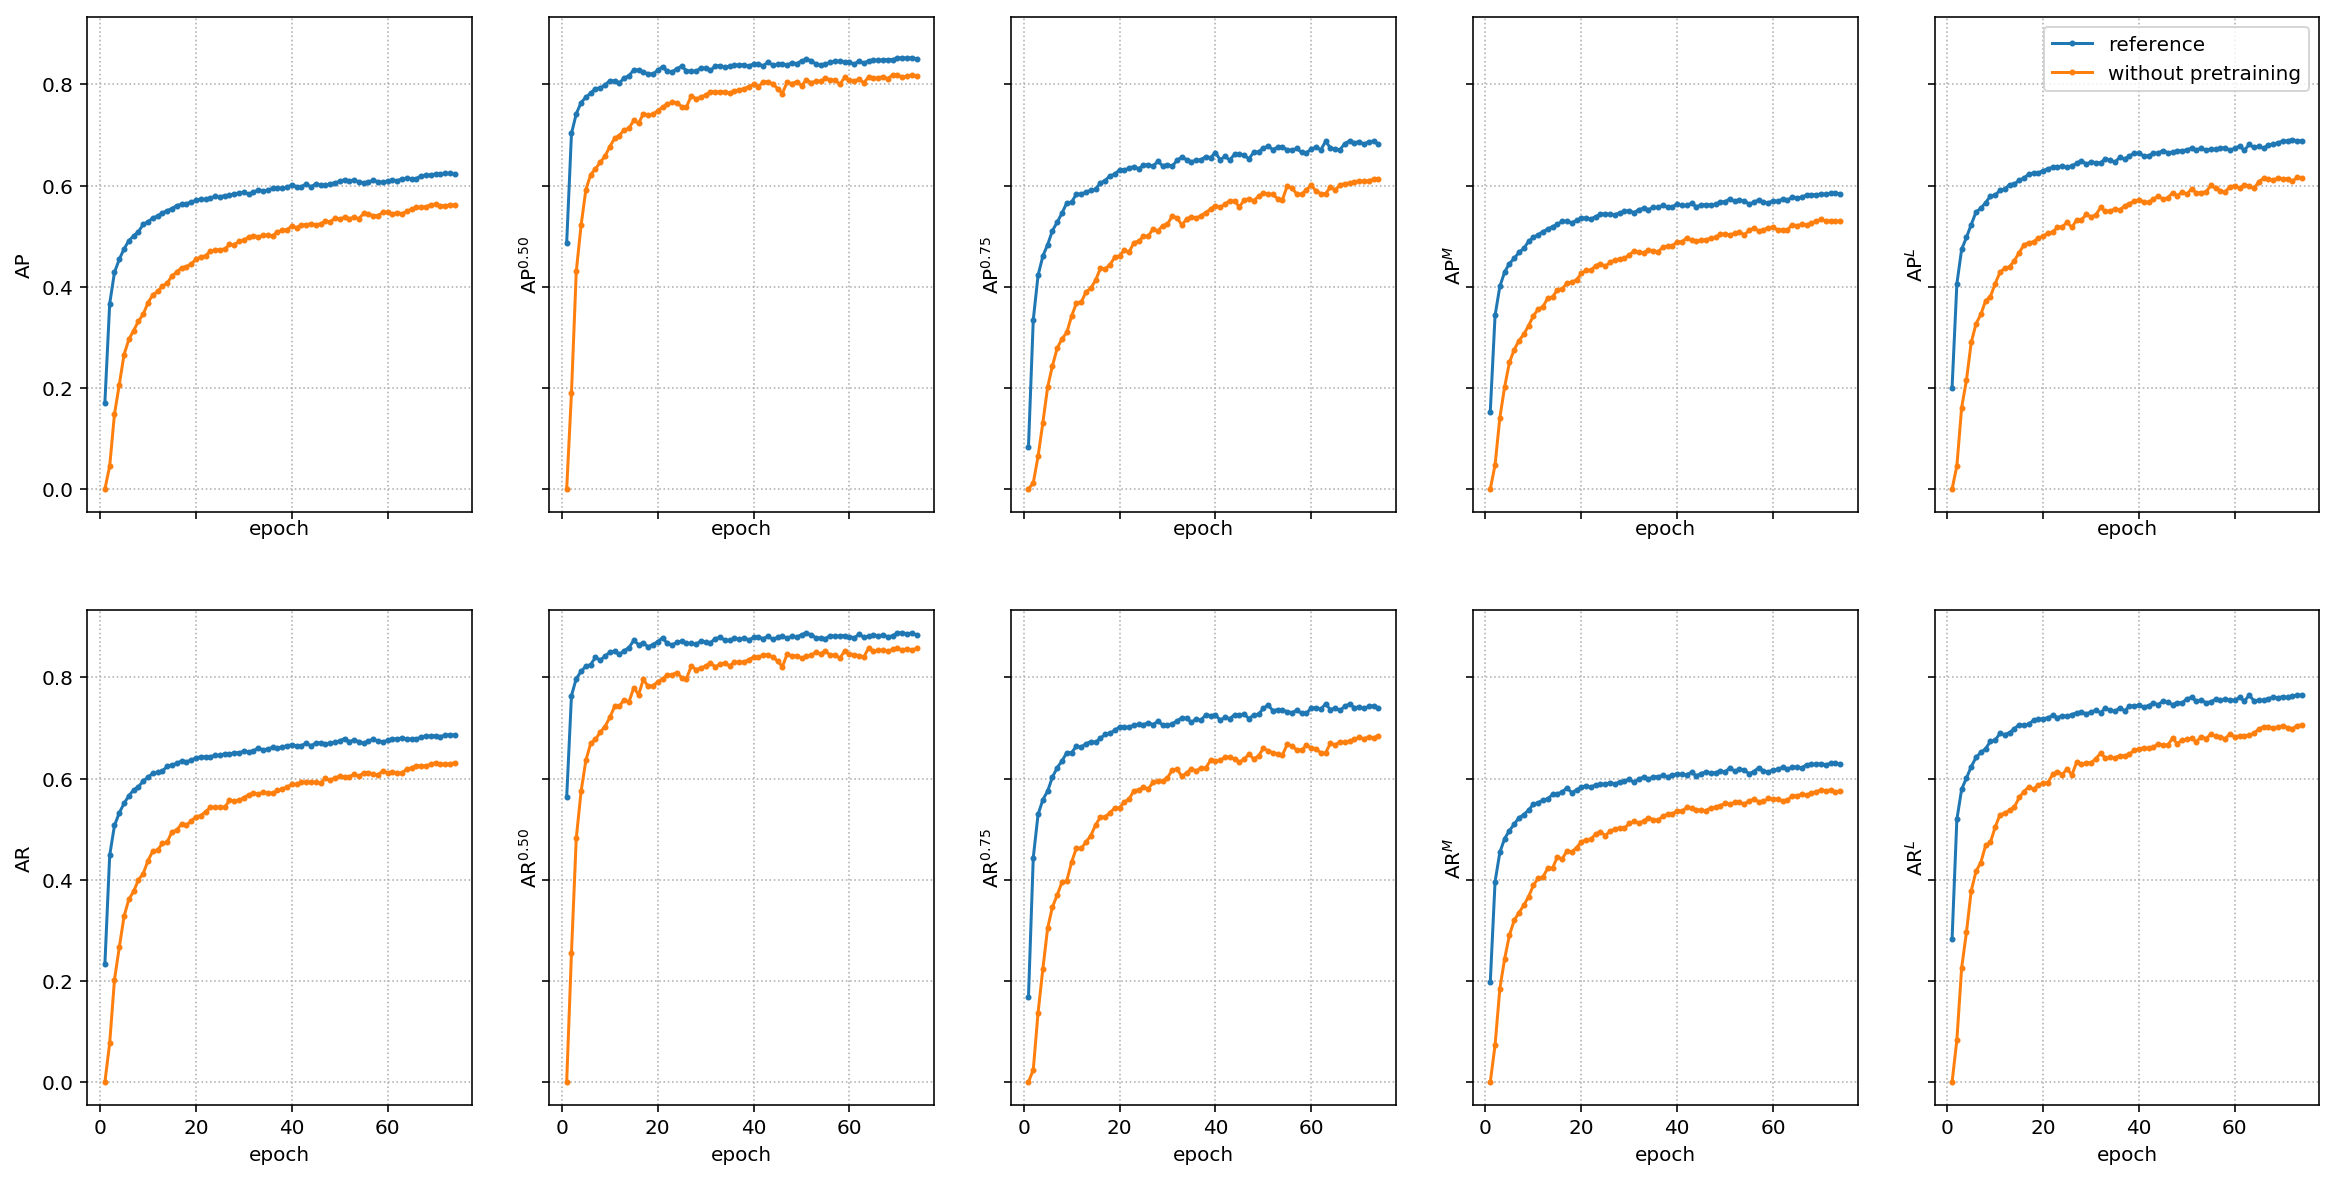

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
plots = openpifpaf.logs.Plots([
    '../outputs/resnet50block5-pif-paf-edge401-190315-214317.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-190326-122729.pkl.log',
], [
    'reference',
    'without pretraining',
])
#pprint(plots.process_arguments())
plots.train(ax1); ax1.set_yscale('log', nonposy='clip')
plots.epoch_loss(ax2)

# Precision and Recall plots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharey=True, sharex=True)
openpifpaf.logs.EvalPlots(plots.log_files, plots.labels, edge=641, samples=500).fill_all(axs)
axs[0, 4].legend();

# Data Distillation

No visible effect.

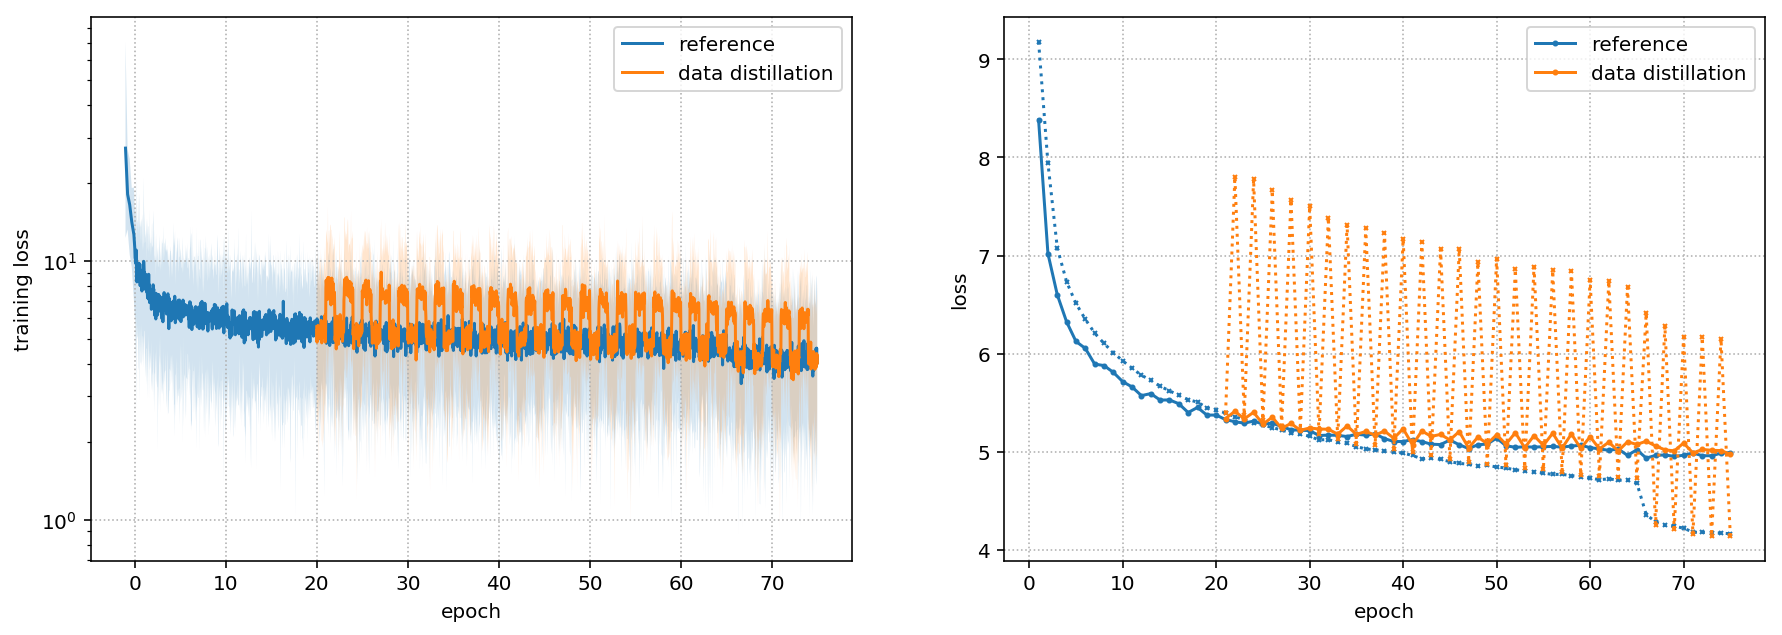

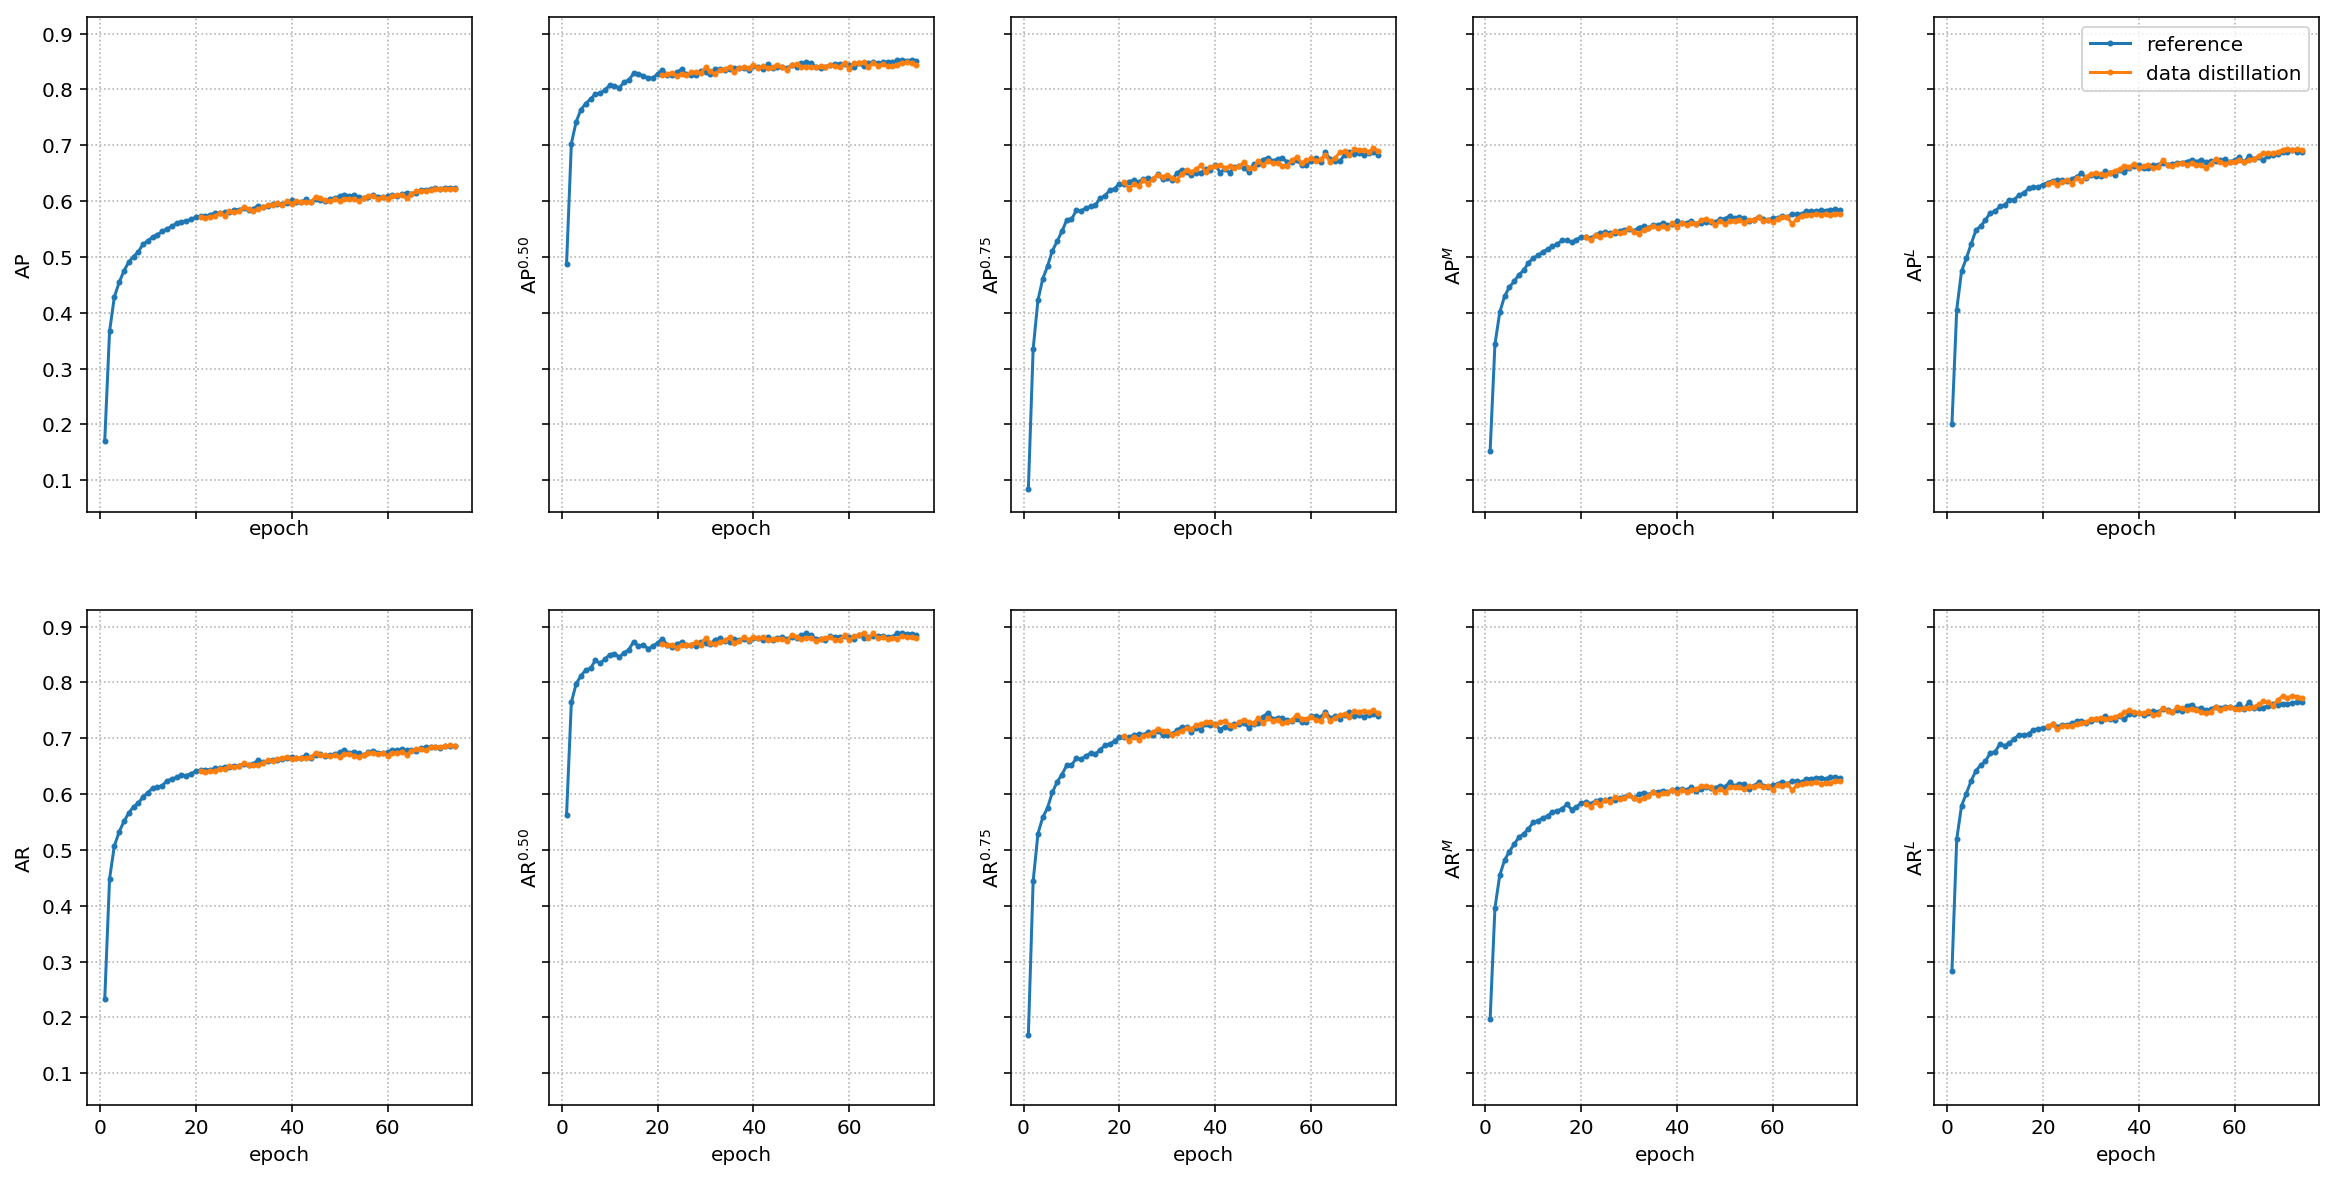

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
plots = openpifpaf.logs.Plots([
    '../outputs/resnet50block5-pif-paf-edge401-190315-214317.pkl.log',
    '../outputs/resnet50block5-pif-paf-edge401-190325-093747.pkl.log',
], [
    'reference',
    'data distillation',
])
#pprint(plots.process_arguments())
plots.train(ax1); ax1.set_yscale('log', nonposy='clip')
plots.epoch_loss(ax2)

# Precision and Recall plots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharey=True, sharex=True)
openpifpaf.logs.EvalPlots(plots.log_files, plots.labels, edge=641, samples=500).fill_all(axs)
axs[0, 4].legend();